# Fase 2: Divisão dos Dados
Este arquivo realiza a **divisão dos dados**, preparando-os para as fases subsequentes de modelagem e treinamento dos algoritmos de aprendizado de máquina. Abaixo está um resumo das principais etapas e funcionalidades implementadas nesta fase.

## Etapas da Divisão dos Dados

### 1. Importação das Bibliotecas
As bibliotecas necessárias para a criação e avaliação dos modelos são importadas, como:
- `pandas` para manipulação de dados
- `sklearn.model_selection` para a função train_test_split, que realiza a divisão dos dados

### 2. Definição das Variáveis Independentes e Dependentes
As variáveis são definidas para a divisão:

- `X`: Contém as variáveis independentes, ou seja, todas as colunas exceto a variável alvo.
- `y`: Contém a variável dependente, que neste caso é a coluna que indica se houve um ataque cardíaco `HadHeartAttack`.

### 3. Divisão dos Dados
 Os dados são divididos em conjuntos de treino e teste para avaliar o desempenho dos modelos. Esta divisão é realizada utilizando a função `train_test_split` do sklearn.

- `Treino (X_train, y_train)`: Usado para treinar os modelos.
- `Teste (X_test, y_test)`: Usado para avaliar a performance do modelo.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('C:/Users/heloi/tcc/processed_data.csv')

In [7]:
data.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,ECigaretteUsage_Use them some days,RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",CovidPos_Tested positive using home test without a health professional,CovidPos_Yes,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)"
0,1,4,0.0,0.0,0,0,8.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,5,0.0,0.0,0,0,6.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,4,2.0,3.0,0,1,5.0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,1,5,0.0,0.0,0,1,7.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,2,2.0,0.0,0,1,9.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
# Definir as variáveis independentes (X) e dependentes (y)
X = data.drop(columns=['HadHeartAttack'])  # Todas as colunas exceto a variável alvo
y = data['HadHeartAttack']  # A variável alvo

In [9]:
# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Exibir as formas dos conjuntos resultantes
print(f'Treinamento: {X_train.shape}, {y_train.shape}')
print(f'Teste: {X_test.shape}, {y_test.shape}')

Treinamento: (356105, 48), (356105,)
Teste: (89027, 48), (89027,)


In [12]:
# Salvar os dados divididos
joblib.dump((X_train, X_test, y_train, y_test), 'data/data_splits.pkl')
print("Dados divididos salvos em data_splits.pkl")

Dados divididos salvos em data_splits.pkl


In [13]:
# Salvar os dados de teste no Google Drive
joblib.dump((X_test, y_test), 'data/data_test.pkl')
print("Dados de teste salvos em data_test.pkl")

Dados de teste salvos em data_test.pkl


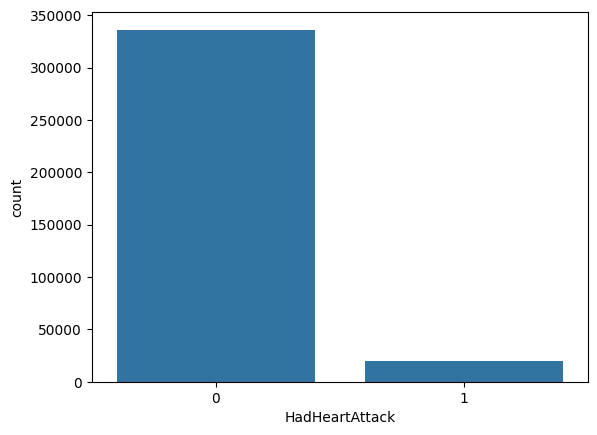

HadHeartAttack
0    0.943921
1    0.056079
Name: proportion, dtype: float64


In [18]:
sns.countplot(x=y_train)
plt.show()

# Ver proporção das classes
print(y_train.value_counts(normalize=True))